# TRABAJO FIN DE MASTER - PABLO GARCIA LOPERA - 2021

#EVOLUCION DE LA PANDEMIA EN DIVERSOS PAISES DEL MUNDO

## LIBRERÍAS

In [ ]:
## 1. BÁSICAS

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

## 2. FUENTES Y GRÁFICOS

plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = (13, 7)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
color_list = ['#8DD3C7', '#FEFFB3', '#BFBBD9'
              , '#FA8174', '#81B1D2', '#FDB462'
              , '#B3DE69', '#BC82BD', '#CCEBC4']

## FUNCIONES

In [ ]:
# CÁLCULO DE DÍAS ENTRE DOS FECHAS
def restar_fechas(fecha_cad1, fecha_cad2):
    dia_ini = datetime.datetime.strptime(fecha_cad1, '%Y-%m-%d')
    dia_fin = datetime.datetime.strptime(fecha_cad2, '%Y-%m-%d')
    diff = dia_fin - dia_ini
    return diff.days

## VARIOS GRÁFICOS EN 1 GRÁFICO
def plot_groupby(data, groupby, column, title, ylabel=None, axis=None):
    """
    PARÁMETROS
        data = dataframe
        groupby(string) = nombre de columna por la que se agrupa
        column(string) = nombre de columna para el eje y
        title(string) = título del gráfico
        axis = eje del gráfico
    """
    fig, ax = plt.subplots(figsize=(11, 7))
    plt.title(f'{title}', fontsize=20)
    ax.set_xlabel('Fecha', size=20)
    if ylabel == None:
        ax.set_ylabel('Número de Casos', size=20)
    else:
        ax.set_ylabel(ylabel, size=20)
    group_list = data.groupby(groupby)
    for group in group_list:
        if axis == None:
            plt.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
        else:
            axis.plot(group[1].date.values
                     , group[1][column].values
                     , label=group[0])
    tick_num = 12
    ax.set_xticks(ax.get_xticks()[::int(len(edades_temp.date.unique())/tick_num)+1])
    ax.legend()
    plt.show()

#DATOS COVID 19 PARA ESPAÑA



In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO Train_SPAIN.csv
from google.colab import files

uploaded = files.upload()

for TimeSpain in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeSpain, length=len(uploaded[TimeSpain])))

Saving Train_SPAIN.csv to Train_SPAIN.csv
User uploaded file "Train_SPAIN.csv" with length 4101 bytes


In [ ]:
# CREAMOS EL DATAFRAME "spain_temp"
import pandas as pd
import io
spain_temp = pd.read_csv(io.StringIO(uploaded[TimeSpain].decode('utf-8')))
spain_temp

,date,time,province,confirmed,released,deceased
0,2020/01/23,0,spain,0,0,0
1,2020/01/24,0,spain,0,0,0
2,2020/01/25,0,spain,0,0,0
3,2020/01/26,0,spain,0,0,0
4,2020/01/27,0,spain,0,0,0
...,...,...,...,...,...,...
129,2020/05/31,0,spain,251462,0,2
130,2020/06/01,0,spain,251621,0,0
131,2020/06/02,0,spain,251915,0,0
132,2020/06/03,0,spain,252169,0,1


###Total Casos confirmados por Fecha (Acumulados)

In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha_spain = pd.DataFrame()
conf_fecha_spain['total'] = spain_temp.groupby('date').sum().confirmed
conf_fecha_spain = conf_fecha_spain.sort_values('date', ascending=True)
display(conf_fecha_spain.T)

date,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,2020/03/02,...,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12,2020/05/13,2020/05/14,2020/05/15,2020/05/16,2020/05/17,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27,2020/05/28,2020/05/29,2020/05/30,2020/05/31,2020/06/01,2020/06/02,2020/06/03,2020/06/04
total,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,...,220868,222699,224007,226151,226669,228450,229816,230700,231245,232563,233559,234681,236091,236812,237584,240670,241264,241925,242774,243417,243932,244453,245361,245792,246310,246792,248579,249045,249527,249872,250196,250481,250768,251013,251211,251462,251621,251915,252169,252414


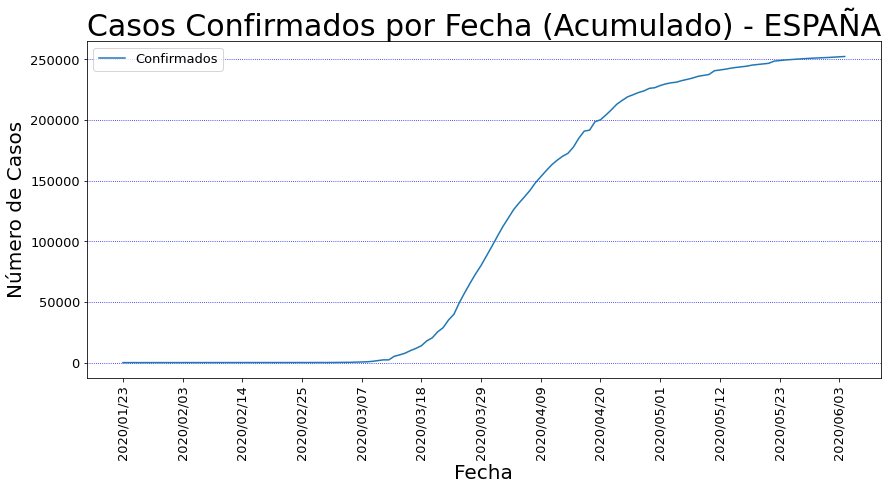

In [ ]:
# TOTAL CASOS CONFIRMADOS POR FECHA (ACUMULADO)	
total_list = spain_temp.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados por Fecha (Acumulado) - ESPAÑA', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(spain_temp.date.unique()
         , spain_temp.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::11])
plt.legend(['Confirmados'])
plt.grid(axis='y',linestyle='dotted', color='b')
plt.xticks(rotation=90)
plt.show()

#DATOS COVID 19 PARA ITALIA

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO Train_ITALY.csv
from google.colab import files

uploaded = files.upload()

for TimeItaly in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeItaly, length=len(uploaded[TimeItaly])))

Saving Train_ITALY.csv to Train_ITALY (2).csv
User uploaded file "Train_ITALY.csv" with length 5783 bytes


In [ ]:
# CREAMOS EL DATAFRAME "italy_temp"
import pandas as pd
import io
italy_temp = pd.read_csv(io.StringIO(uploaded[TimeItaly].decode('utf-8')))
italy_temp

,date,time,province,confirmed,released,deceased;;;;;;;;;;;;
0,2020/01/23,0,Italy,0,0,0;;;;;;;;;;;;
1,2020/01/24,0,Italy,0,0,0;;;;;;;;;;;;
2,2020/01/25,0,Italy,0,0,0;;;;;;;;;;;;
3,2020/01/26,0,Italy,0,0,0;;;;;;;;;;;;
4,2020/01/27,0,Italy,0,0,0;;;;;;;;;;;;
...,...,...,...,...,...,...
129,2020/05/31,0,Italy,232997,0,75;;;;;;;;;;;;
130,2020/06/01,0,Italy,233197,0,60;;;;;;;;;;;;
131,2020/06/02,0,Italy,233515,0,55;;;;;;;;;;;;
132,2020/06/03,0,Italy,233836,0,71;;;;;;;;;;;;


##Total Casos confirmados por Fecha (Acumulados)

In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha_italy = pd.DataFrame()
conf_fecha_italy['total'] = italy_temp.groupby('date').sum().confirmed
conf_fecha_italy = conf_fecha_italy.sort_values('date', ascending=True)
display(conf_fecha_italy.T)

date,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,2020/03/02,...,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12,2020/05/13,2020/05/14,2020/05/15,2020/05/16,2020/05/17,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27,2020/05/28,2020/05/29,2020/05/30,2020/05/31,2020/06/01,2020/06/02,2020/06/03,2020/06/04
total,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,...,197675,199414,201505,203591,205463,207428,209328,210717,211938,213013,214457,215858,217185,218268,219070,219814,221216,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658,229327,229858,230158,230555,231139,231732,232248,232664,232997,233197,233515,233836,234013


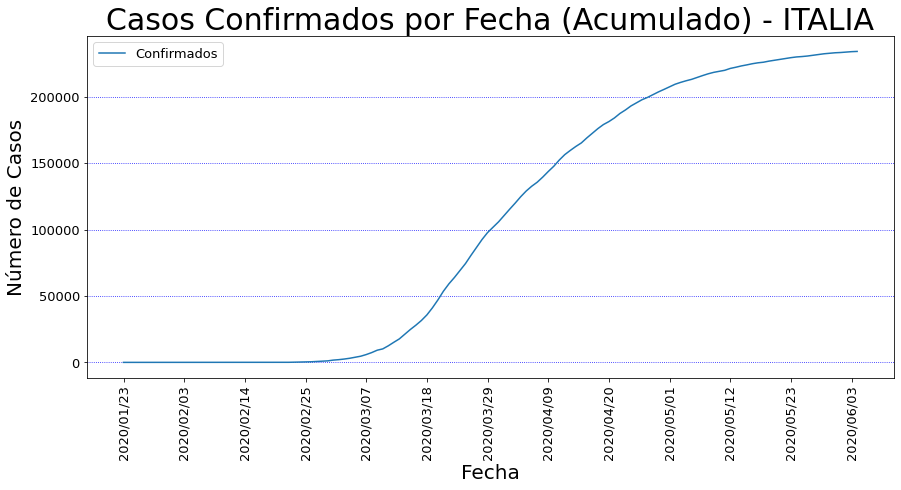

In [ ]:
# TOTAL CASOS CONFIRMADOS POR FECHA (ACUMULADO)	
total_list = italy_temp.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados por Fecha (Acumulado) - ITALIA', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(italy_temp.date.unique()
         , italy_temp.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::11])
plt.legend(['Confirmados'])
plt.grid(axis='y',linestyle='dotted', color='b')
plt.xticks(rotation=90)
plt.show()

#DATOS COVID 19 PARA ALEMANIA

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO Train_GERMANY.csv
from google.colab import files

uploaded = files.upload()

for TimeGermany in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeGermany, length=len(uploaded[TimeGermany])))

Saving Train_GERMANY.csv to Train_GERMANY.csv
User uploaded file "Train_GERMANY.csv" with length 4362 bytes


In [ ]:
# CREAMOS EL DATAFRAME "germany_temp"
import pandas as pd
import io
germany_temp = pd.read_csv(io.StringIO(uploaded[TimeGermany].decode('utf-8')))
germany_temp

,date,time,province,confirmed,released,deceased
0,2020/01/23,0,Germany,0,0,0
1,2020/01/24,0,Germany,0,0,0
2,2020/01/25,0,Germany,0,0,0
3,2020/01/26,0,Germany,0,0,0
4,2020/01/27,0,Germany,1,0,0
...,...,...,...,...,...,...
129,2020/05/31,0,Germany,181010,0,10
130,2020/06/01,0,Germany,181194,0,15
131,2020/06/02,0,Germany,181479,0,8
132,2020/06/03,0,Germany,181721,0,39


##Total Casos confirmados por Fecha (Acumulados)

In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha_germany = pd.DataFrame()
conf_fecha_germany['total'] = germany_temp.groupby('date').sum().confirmed
conf_fecha_germany = conf_fecha_germany.sort_values('date', ascending=True)
display(conf_fecha_germany.T)

date,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,2020/03/02,...,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12,2020/05/13,2020/05/14,2020/05/15,2020/05/16,2020/05/17,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27,2020/05/28,2020/05/29,2020/05/30,2020/05/31,2020/06/01,2020/06/02,2020/06/03,2020/06/04
total,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,...,156470,157458,158612,160239,161709,162777,163667,164364,164852,165707,165862,167130,168288,169024,169579,170276,170871,171798,172078,172833,173352,173969,174151,175378,176073,176621,177310,177586,177928,178200,178800,179124,179796,180522,180789,181010,181194,181479,181721,182072


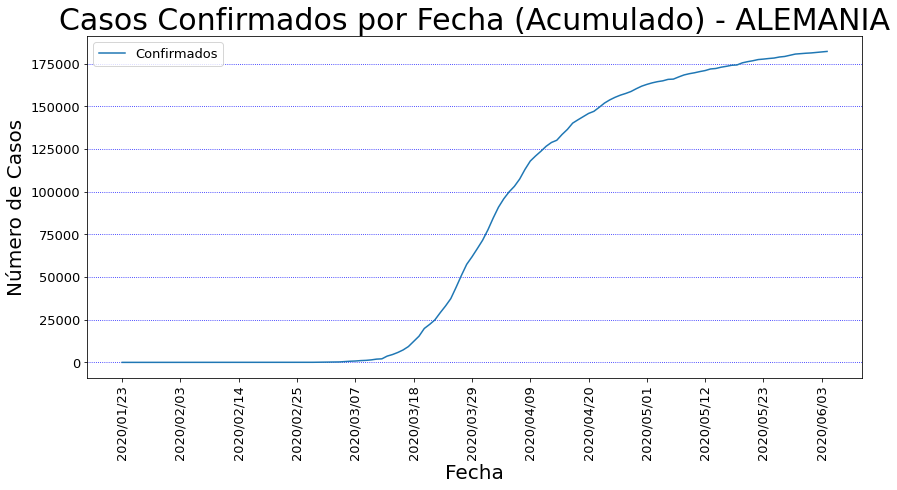

In [ ]:
# TOTAL CASOS CONFIRMADOS POR FECHA (ACUMULADO)	
total_list = germany_temp.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados por Fecha (Acumulado) - ALEMANIA', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(germany_temp.date.unique()
         , germany_temp.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::11])
plt.legend(['Confirmados'])
plt.grid(axis='y',linestyle='dotted', color='b')
plt.xticks(rotation=90)
plt.show()

#DATOS COVID 19 PARA FRANCIA

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO Train_FRANCE.csv
from google.colab import files

uploaded = files.upload()

for TimeFrance in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeFrance, length=len(uploaded[TimeFrance])))

Saving Train_FRANCE.csv to Train_FRANCE.csv
User uploaded file "Train_FRANCE.csv" with length 4250 bytes


In [ ]:
# CREAMOS EL DATAFRAME "france_temp"
import pandas as pd
import io
france_temp = pd.read_csv(io.StringIO(uploaded[TimeFrance].decode('utf-8')))
france_temp

,date,time,province,confirmed,released,deceased
0,2020/01/23,0,France,0,0,0
1,2020/01/24,0,France,2,0,0
2,2020/01/25,0,France,3,0,0
3,2020/01/26,0,France,3,0,0
4,2020/01/27,0,France,3,0,0
...,...,...,...,...,...,...
129,2020/05/31,0,France,185851,0,31
130,2020/06/01,0,France,185952,0,28
131,2020/06/02,0,France,184980,0,107
132,2020/06/03,0,France,188836,0,81


##Total Casos confirmados por Fecha (Acumulados)

In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha_france = pd.DataFrame()
conf_fecha_france['total'] = france_temp.groupby('date').sum().confirmed
conf_fecha_france = conf_fecha_france.sort_values('date', ascending=True)
display(conf_fecha_france.T)

date,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,2020/03/02,...,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12,2020/05/13,2020/05/14,2020/05/15,2020/05/16,2020/05/17,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27,2020/05/28,2020/05/29,2020/05/30,2020/05/31,2020/06/01,2020/06/02,2020/06/03,2020/06/04
total,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,...,160847,164589,167605,165093,165764,165764,166976,167272,167886,168935,172465,173040,174318,174758,175027,175479,176207,175981,176712,177319,177207,177240,177554,178428,179069,179306,179645,179964,179859,180166,179887,180044,183309,183816,185616,185851,185952,184980,188836,185986


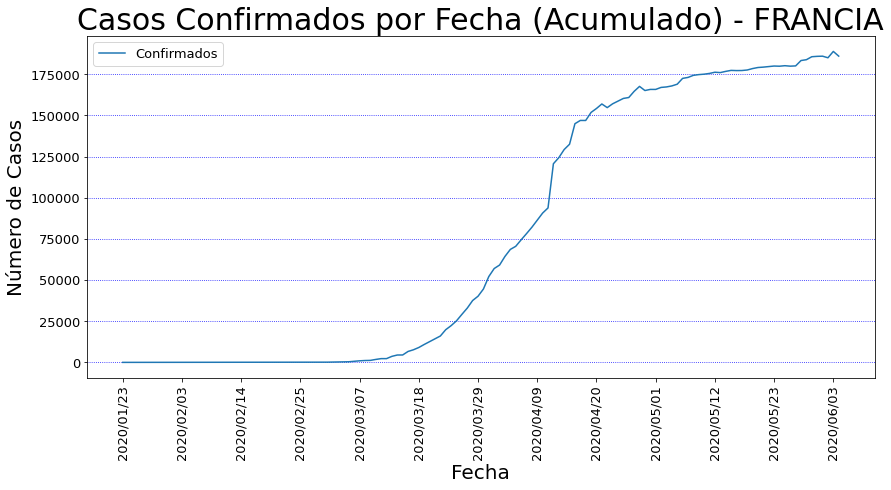

In [ ]:
# TOTAL CASOS CONFIRMADOS POR FECHA (ACUMULADO)	
total_list = france_temp.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados por Fecha (Acumulado) - FRANCIA', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(france_temp.date.unique()
         , france_temp.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::11])
plt.legend(['Confirmados'])
plt.grid(axis='y',linestyle='dotted', color='b')
plt.xticks(rotation=90)
plt.show()

#DATOS COVID 19 PARA BRASIL

In [ ]:
# CARGAMOS LOS DATOS DESDE EL FICHERO Train_BRAZIL.csv
from google.colab import files

uploaded = files.upload()

for TimeBrazil in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=TimeBrazil, length=len(uploaded[TimeBrazil])))

Saving Train_BRAZIL.csv to Train_BRAZIL.csv
User uploaded file "Train_BRAZIL.csv" with length 4261 bytes


In [ ]:
# CREAMOS EL DATAFRAME "brazil_temp"
import pandas as pd
import io
brazil_temp = pd.read_csv(io.StringIO(uploaded[TimeBrazil].decode('utf-8')))
brazil_temp

,date,time,province,confirmed,released,deceased
0,2020/01/23,0,Brazil,0,0.0,0
1,2020/01/24,1,Brazil,0,0.0,0
2,2020/01/25,2,Brazil,0,0.0,0
3,2020/01/26,3,Brazil,0,0.0,0
4,2020/01/27,4,Brazil,0,0.0,0
...,...,...,...,...,...,...
130,2020/05/31,130,Brazil,513849,NaN,480
131,2020/06/01,131,Brazil,525447,NaN,623
132,2020/06/02,132,Brazil,554383,NaN,1262
133,2020/06/03,133,Brazil,583016,NaN,1349


In [ ]:
# DETALLE CASOS CONFIRMADOS POR DÍAS
conf_fecha_brazil = pd.DataFrame()
conf_fecha_brazil['total'] = brazil_temp.groupby('date').sum().confirmed
conf_fecha_brazil = conf_fecha_brazil.sort_values('date', ascending=True)
display(conf_fecha_brazil.T)

date,2020/01/23,2020/01/24,2020/01/25,2020/01/26,2020/01/27,2020/01/28,2020/01/29,2020/01/30,2020/01/31,2020/02/01,2020/02/02,2020/02/03,2020/02/04,2020/02/05,2020/02/06,2020/02/07,2020/02/08,2020/02/09,2020/02/10,2020/02/11,2020/02/12,2020/02/13,2020/02/14,2020/02/15,2020/02/16,2020/02/17,2020/02/18,2020/02/19,2020/02/20,2020/02/21,2020/02/22,2020/02/23,2020/02/24,2020/02/25,2020/02/26,2020/02/27,2020/02/28,2020/02/29,2020/03/01,2020/03/02,...,2020/04/26,2020/04/27,2020/04/28,2020/04/29,2020/04/30,2020/05/01,2020/05/02,2020/05/03,2020/05/04,2020/05/05,2020/05/06,2020/05/07,2020/05/08,2020/05/09,2020/05/10,2020/05/11,2020/05/12,2020/05/13,2020/05/14,2020/05/15,2020/05/16,2020/05/17,2020/05/18,2020/05/19,2020/05/20,2020/05/21,2020/05/22,2020/05/23,2020/05/24,2020/05/25,2020/05/26,2020/05/27,2020/05/28,2020/05/29,2020/05/30,2020/05/31,2020/06/01,2020/06/02,2020/06/03,2020/06/04
total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,...,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890,347398,363211,374898,391222,411821,438238,465166,497440,513849,525447,554383,583016,613941


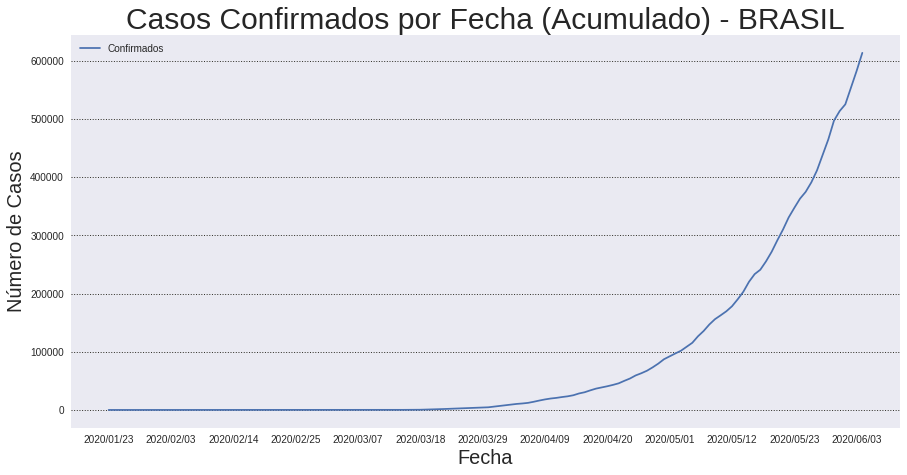

In [ ]:
# TOTAL CASOS CONFIRMADOS POR FECHA (ACUMULADO)	
total_list = brazil_temp.groupby('date').sum().confirmed

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Casos Confirmados por Fecha (Acumulado) - BRASIL', fontsize=30)
ax.set_xlabel('Fecha', size=20)
ax.set_ylabel('Número de Casos', size=20)
plt.plot(brazil_temp.date.unique()
         , brazil_temp.groupby('date').sum().confirmed)
ax.set_xticks(ax.get_xticks()[::11])
plt.legend(['Confirmados'])
plt.show()